## Lab 11. Exploratory Analysis
Exploratory analysis helps us to know more about the datasets before geovisualization. The explorative analysis also help us to get new insight for the dataset. This tutorial is used to do exploratory analysis on spatial data. We will use modules of `seaborn` and `pysal` to create histogram, box map, scatter, correlation analysis, spatial autocorrelation, and choropleth mapping. 

### 1. Prepare and import required modules

Prepare the python module, the new modeuls is `seaborn`. If you have `seaborn` not installed, just go to your virtual environment in Anaconda and type `conda install seaborn` in your virtual environment.

In [1]:
import seaborn
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

### 2. Prepare the data
Read the geojson file of blood lead level data and check the data

In [2]:
blood_gdf = gpd.read_file('data/blood_lead.geojson')
blood_gdf.head(15)

,census_tra,data_redac,num_bll_5p,num_screen,perc_5plus,geometry
0,42101000100,0,0.0,100.0,0.0,(POLYGON ((-75.14147213273969 39.9517072267047...
1,42101000200,1,NaN,109.0,NaN,"(POLYGON ((-75.162377698504 39.9576545523082, ..."
2,42101000300,1,NaN,110.0,NaN,(POLYGON ((-75.17820482839041 39.9598134132842...
3,42101000401,1,NaN,61.0,NaN,"(POLYGON ((-75.1729917788024 39.9546437050483,..."
4,42101000402,0,0.0,41.0,0.0,"(POLYGON ((-75.1633313650233 39.9533392100125,..."
5,42101000500,1,NaN,49.0,NaN,"(POLYGON ((-75.1634037710016 39.9533470650473,..."
6,42101000600,0,0.0,24.0,0.0,"(POLYGON ((-75.1639387712695 39.9508740649554,..."
7,42101000700,0,0.0,57.0,0.0,(POLYGON ((-75.17349243240059 39.9520618460711...
8,42101000801,1,NaN,57.0,NaN,"(POLYGON ((-75.1774238003255 39.9505040569508,..."
9,42101000803,0,0.0,63.0,0.0,"(POLYGON ((-75.1774238003255 39.9505040569508,..."


In [3]:
blood_gdf['perc_5plus'].describe
blood_gdf.describe

<bound method NDFrame.describe of       census_tra  data_redac  num_bll_5p  num_screen  perc_5plus  \
0    42101000100           0         0.0       100.0         0.0   
1    42101000200           1         NaN       109.0         NaN   
2    42101000300           1         NaN       110.0         NaN   
3    42101000401           1         NaN        61.0         NaN   
4    42101000402           0         0.0        41.0         0.0   
..           ...         ...         ...         ...         ...   
375  42101980200           1         NaN         NaN         NaN   
376  42101980700           1         NaN         NaN         NaN   
377  42101980800           1         NaN         NaN         NaN   
378  42101980900           1         NaN         NaN         NaN   
379  42101989100           1         NaN         NaN         NaN   

                                              geometry  
0    (POLYGON ((-75.14147213273969 39.9517072267047...  
1    (POLYGON ((-75.162377698504 39

The max, min, and std values of the variable

In [158]:
maxvalue = blood_gdf['perc_5plus'].max()
minvalue = blood_gdf['perc_5plus'].min()
stand = blood_gdf['perc_5plus'].std()

print('The max, min, and standard deviation values are:', maxvalue, minvalue, stand)

The max, min, and standard deviation values are: 17.6 0.0 3.9393103190846737


The number of null data

In [160]:
import pandas as pd

pd.isnull(blood_gdf['perc_5plus']).sum()

126

### 3. Choropleth mapping
Create the choropleth map of the blood lead level data in Philadelphia

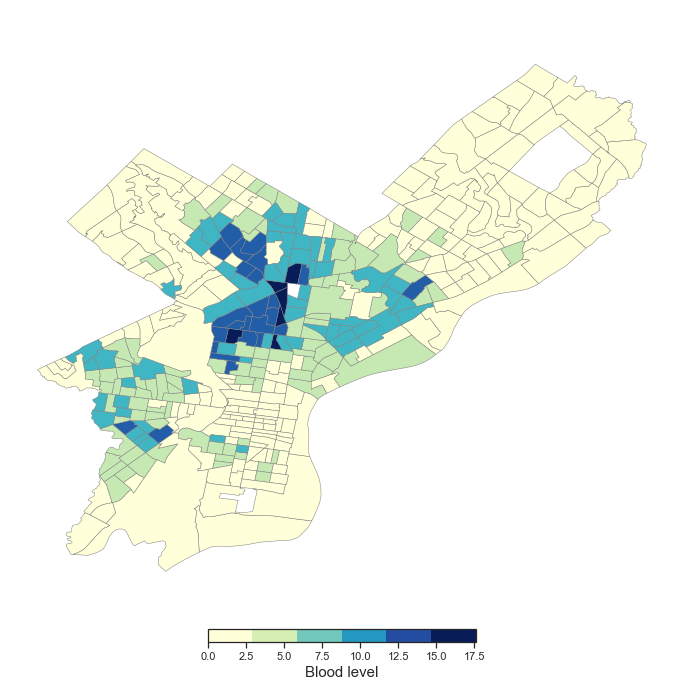

In [165]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
# from matplotlib import cm


f, ax = plt.subplots(1, figsize=(12, 12), subplot_kw={'aspect':'equal'})

blood_lead_gdf = gpd.read_file('data/blood_lead.geojson')

# change the projection to local projection of Philadelphia
blood_lead_gdf_phily = blood_lead_gdf.to_crs({'init': 'epsg:3651'})
blood_lead_gdf_phily = blood_lead_gdf


cmap = plt.cm.get_cmap('YlGnBu', 6) #alternative GnBu

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column='perc_5plus', 
                         cmap='YlGnBu', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         scheme='equal_interval')

# create a color bar for the map
norm = Normalize(vmin=blood_lead_gdf['perc_5plus'].min(), vmax=blood_lead_gdf['perc_5plus'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.0, shrink=0.4)
cbar.ax.set_xlabel('Blood level')

ax.set_axis_off()
plt.axis('equal')
# plt.savefig('plot.png', bbox_inches='tight', pad_inches=0.1, dpi=1000)

plt.show()

### 4. Plot histograms

Prepare the data, this is not necessary because you have already read the geojson file

In [4]:
blood_lead_gdf = gpd.read_file('data/blood_lead.geojson')
blood_lead_gdf.head()

,census_tra,data_redac,num_bll_5p,num_screen,perc_5plus,geometry
0,42101000100,0,0.0,100.0,0.0,(POLYGON ((-75.14147213273969 39.9517072267047...
1,42101000200,1,NaN,109.0,NaN,"(POLYGON ((-75.162377698504 39.9576545523082, ..."
2,42101000300,1,NaN,110.0,NaN,(POLYGON ((-75.17820482839041 39.9598134132842...
3,42101000401,1,NaN,61.0,NaN,"(POLYGON ((-75.1729917788024 39.9546437050483,..."
4,42101000402,0,0.0,41.0,0.0,"(POLYGON ((-75.1633313650233 39.9533392100125,..."


There are some records have NaN data, therefore, we need to drop it for further analysis

In [6]:
blood_lead_gdf_valid = blood_lead_gdf.dropna(how='any',axis=0) 

Plot the histogram of column `perc_5plus`

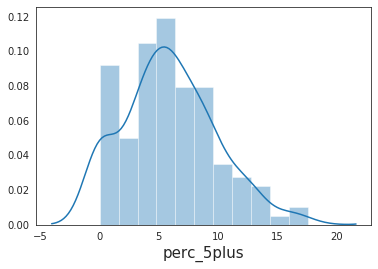

In [7]:
import seaborn as sns

# set the label size of the histogram
plt.rcParams["axes.labelsize"] = 15

# get the column of perc_5plus
perc_5plus = blood_lead_gdf_valid['perc_5plus']

# plot the histogram distribution 
with sns.axes_style("white"):
    sns.distplot(perc_5plus)

histogram for column of `num_bll_5p`

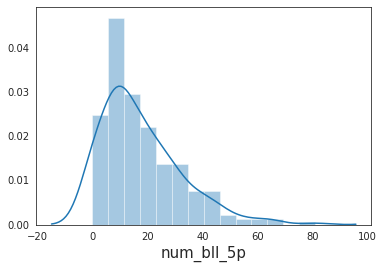

In [8]:
num_bll_5p = blood_lead_gdf_valid['num_bll_5p']

with sns.axes_style("white"):
    sns.distplot(num_bll_5p)


Selecting data using Labels (Column Headings). Only get the data for columns of "num_bll_5p" and "perc_5plus"

### 5. Boxplot
We can plot the boxplot of data to check the distributions of different variables in our dataframe. **Note**: slice two columns from `blood_lead_gdf_valid` and create a new dataframe.


In [10]:
# slice two column from `blood_lead_gdf_valid` and create a new dataframe
plot_df = blood_lead_gdf_valid[['num_bll_5p', 'perc_5plus']]


Plot the boxplot and assign different colors to different variables

Text(0.5, 1.0, 'Box maps')

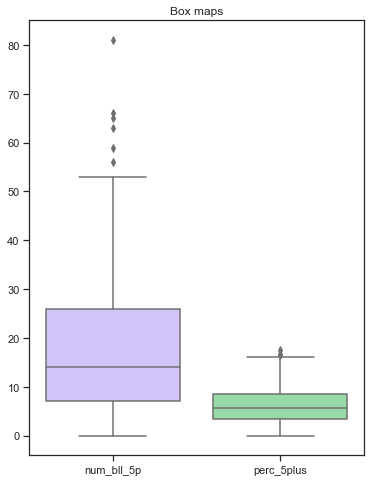

In [11]:
# set the size of the plot
plt.figure(figsize=(6, 8))

sns.set_style("white")
sns.set(style="ticks", palette="pastel")

sns.boxplot(data=plot_df, palette=["m", "g"])
plt.title("Box maps")


### 6. Scatterplots
Plot the scatter of multiple variables

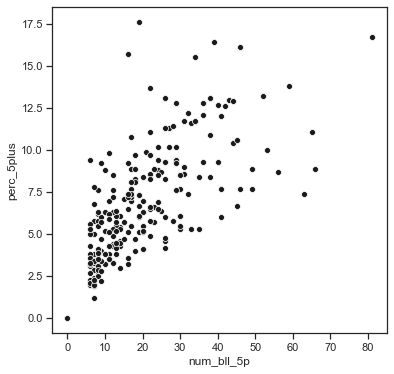

In [12]:
plt.figure(figsize=(6, 6))

ax = sns.scatterplot(x="num_bll_5p", y="perc_5plus", data=plot_df, color='k')


Plot the scatter and the histograms together

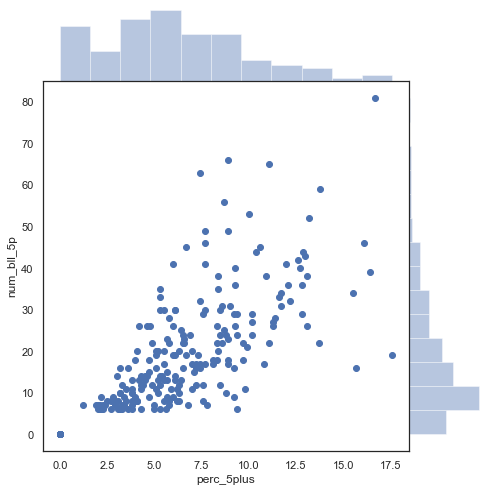

In [14]:
sns.set(style="white")

with sns.axes_style("white"):
    sns.jointplot(x=perc_5plus, y=num_bll_5p, data=plot_df, height=7, space=0) #kind="hex",

By setting the kind, you can create different types of scatter plot, #“scatter” | “reg” | “resid” | “kde” | “hex”

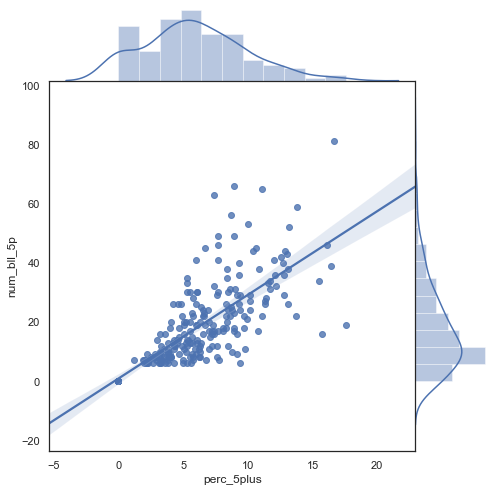

In [15]:
sns.set(style="white")

with sns.axes_style("white"):
    sns.jointplot(x=perc_5plus, y=num_bll_5p, data=plot_df, kind="reg", height=7, space=0)
    
    

### 7. Calculating correlations
You can use pandas to do very basic correlation analysis, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [16]:
# pearson correlation
plot_df.corr(method = 'pearson')

,num_bll_5p,perc_5plus
num_bll_5p,1.000000,0.757234
perc_5plus,0.757234,1.000000


In [17]:
# spearman correlation or rank correlation
plot_df.corr(method = 'spearman')

,num_bll_5p,perc_5plus
num_bll_5p,1.000000,0.822991
perc_5plus,0.822991,1.000000


### 8. Spatial Autocorrelation

Our brains are very powerful pattern recognition machines. However, sometimes they can be too powerful and lead us to detect false positives, or patterns where there are no statistical patterns. This is a particular concern when dealing with visualization of irregular polygons of differning sizes and shapes.



In [18]:
import libpysal as lps

# fill the nan with mean value of the column
blood_lead_gdf['perc_5plus'].fillna((blood_lead_gdf['perc_5plus'].mean()), inplace=True)

# create the queen spatial weight
df = blood_lead_gdf
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

In [19]:
wq.transform = 'r'
y = df['perc_5plus']

Install module of esda, `pip install esda`. Calculate the morans'I coefficient

In [21]:
import esda
import numpy as np

np.random.seed(12345)

# calculate the moran's I coefficient
mi = esda.moran.Moran(y, wq)
mi.I

0.4671604794874547

Test the significance level of the Moran's I coefficient

Text(0.5, 0, "Moran's I")

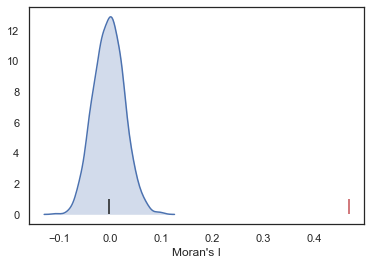

In [22]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")


P value of the moran's I

In [207]:
mi.p_sim

0.001

## Homework
1. Finish the above tutorial
2. Using a **NEW** data to apply the tutorial. You can use any other types of data
3. Upload your `ipynb` file


## Reference
- Seabor Gallery, https://seaborn.pydata.org/examples/index.html
- Pandas data manipulation, https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/
- Spatial Analysis using Pysal, https://nbviewer.jupyter.org/github/pysal/esda/blob/master/notebooks/Spatial%20Autocorrelation%20for%20Areal%20Unit%20Data.ipynb